In [3]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import plotly
import plotly.graph_objs as go
import plotly.express as px

from sklearn.cluster import KMeans


import seaborn as sb
import matplotlib.pyplot as plt


def PCA(X , num_components):
    
    #Step-1
    X_meaned = X - np.mean(X , axis = 0)
    
    #Step-2
    cov_mat = np.cov(X_meaned , rowvar = False)
    
    #Step-3
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
    
    #Step-4
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
    
    #Step-5
    eigenvector_subset = sorted_eigenvectors[:,0:num_components]
    
    #Step-6
    X_reduced = np.dot(eigenvector_subset.transpose() , X_meaned.transpose() ).transpose()
    
    
    return X_reduced 


In [4]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
data = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

In [5]:
data.head(100)

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,Iris-versicolor
96,5.7,2.9,4.2,1.3,Iris-versicolor
97,6.2,2.9,4.3,1.3,Iris-versicolor
98,5.1,2.5,3.0,1.1,Iris-versicolor


In [19]:
#Get the IRIS dataset


#prepare the data
origin = data.iloc[:,0:4]


#prepare the target
target = data.iloc[:,4]

#Applying it to PCA function
X_meaned = origin - np.mean(origin , axis = 0)

X_meaned


,sepal length,sepal width,petal length,petal width
0,-0.743333,0.446,-2.358667,-0.998667
1,-0.943333,-0.054,-2.358667,-0.998667
2,-1.143333,0.146,-2.458667,-0.998667
3,-1.243333,0.046,-2.258667,-0.998667
4,-0.843333,0.546,-2.358667,-0.998667
...,...,...,...,...
145,0.856667,-0.054,1.441333,1.101333
146,0.456667,-0.554,1.241333,0.701333
147,0.656667,-0.054,1.441333,0.801333
148,0.356667,0.346,1.641333,1.101333


In [20]:
cov_mat = np.cov(X_meaned , rowvar = False)

cov_mat

array([[ 0.68569351, -0.03926846,  1.27368233,  0.5169038 ],
       [-0.03926846,  0.18800403, -0.32171275, -0.11798121],
       [ 1.27368233, -0.32171275,  3.11317942,  1.29638747],
       [ 0.5169038 , -0.11798121,  1.29638747,  0.58241432]])

In [21]:
eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)

eigen_values, eigen_vectors

(array([0.02368303, 0.07852391, 0.24224357, 4.22484077]),
 array([[ 0.31725455,  0.58099728,  0.65653988, -0.36158968],
        [-0.32409435, -0.59641809,  0.72971237,  0.08226889],
        [-0.47971899, -0.07252408, -0.1757674 , -0.85657211],
        [ 0.75112056, -0.54906091, -0.07470647, -0.35884393]]))

In [22]:
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
    
    #Step-5
    eigenvector_subset = sorted_eigenvectors[:,0:2]
    eigenvector_subset

array([[-0.36158968,  0.65653988],
       [ 0.08226889,  0.72971237],
       [-0.85657211, -0.1757674 ],
       [-0.35884393, -0.07470647]])

In [23]:
X_reduced = np.dot(eigenvector_subset.transpose() , X_meaned.transpose() ).transpose()

In [24]:
X_reduced

array([[ 2.68420713,  0.32660731],
       [ 2.71539062, -0.16955685],
       [ 2.88981954, -0.13734561],
       [ 2.7464372 , -0.31112432],
       [ 2.72859298,  0.33392456],
       [ 2.27989736,  0.74778271],
       [ 2.82089068, -0.08210451],
       [ 2.62648199,  0.17040535],
       [ 2.88795857, -0.57079803],
       [ 2.67384469, -0.1066917 ],
       [ 2.50652679,  0.65193501],
       [ 2.61314272,  0.02152063],
       [ 2.78743398, -0.22774019],
       [ 3.22520045, -0.50327991],
       [ 2.64354322,  1.1861949 ],
       [ 2.38386932,  1.34475434],
       [ 2.6225262 ,  0.81808967],
       [ 2.64832273,  0.31913667],
       [ 2.19907796,  0.87924409],
       [ 2.58734619,  0.52047364],
       [ 2.3105317 ,  0.39786782],
       [ 2.54323491,  0.44003175],
       [ 3.21585769,  0.14161557],
       [ 2.30312854,  0.10552268],
       [ 2.35617109, -0.03120959],
       [ 2.50791723, -0.13905634],
       [ 2.469056  ,  0.13788731],
       [ 2.56239095,  0.37468456],
       [ 2.63982127,

In [27]:
principal_df = pd.DataFrame(X_reduced , columns = ['PC1',"PC2"])

Xsecond =  KMeans(n_clusters=3, random_state=0).fit(principal_df)
labels2 = Xsecond.labels_
principal_df

#Concat it with target variable to create a complete Dataset


,PC1,PC2
0,2.684207,0.326607
1,2.715391,-0.169557
2,2.889820,-0.137346
3,2.746437,-0.311124
4,2.728593,0.333925
...,...,...
145,-1.944017,0.187415
146,-1.525664,-0.375021
147,-1.764046,0.078519
148,-1.901629,0.115877


In [28]:
principal = pd.concat([principal_df , pd.DataFrame(target)] , axis = 1)
k_means2  = pd.concat([principal_df , pd.DataFrame({'target' :labels2})] , axis = 1)
principal, k_means2

(          PC1       PC2          target
 0    2.684207  0.326607     Iris-setosa
 1    2.715391 -0.169557     Iris-setosa
 2    2.889820 -0.137346     Iris-setosa
 3    2.746437 -0.311124     Iris-setosa
 4    2.728593  0.333925     Iris-setosa
 ..        ...       ...             ...
 145 -1.944017  0.187415  Iris-virginica
 146 -1.525664 -0.375021  Iris-virginica
 147 -1.764046  0.078519  Iris-virginica
 148 -1.901629  0.115877  Iris-virginica
 149 -1.389666 -0.282887  Iris-virginica
 
 [150 rows x 3 columns],
           PC1       PC2  target
 0    2.684207  0.326607       0
 1    2.715391 -0.169557       0
 2    2.889820 -0.137346       0
 3    2.746437 -0.311124       0
 4    2.728593  0.333925       0
 ..        ...       ...     ...
 145 -1.944017  0.187415       1
 146 -1.525664 -0.375021       2
 147 -1.764046  0.078519       1
 148 -1.901629  0.115877       1
 149 -1.389666 -0.282887       2
 
 [150 rows x 3 columns])

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

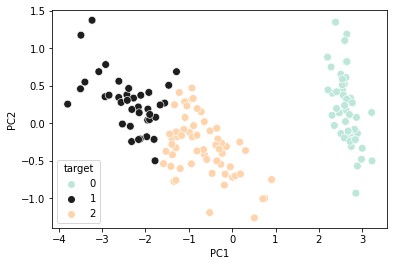

In [103]:
plt.figure()
sb.scatterplot(data = k_means2 , x = 'PC1',y= 'PC2', hue = "target", s = 60 , palette= 'icefire')



<AxesSubplot:xlabel='PC1', ylabel='PC2'>

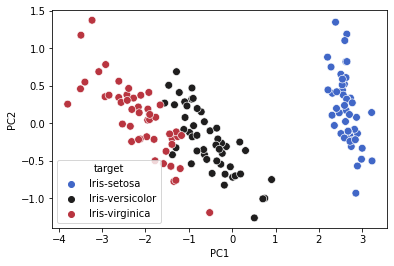

In [172]:
plt.figure()
sb.scatterplot(data = principal , x = 'PC1',y= 'PC2', hue = 'target' , s = 60 , palette= 'icefire')


In [344]:
markercolor = data['target'].replace("Iris-setosa","red").replace("Iris-versicolor","yellow").replace("Iris-virginica","darkviolet")
markersize = data['sepal length']*3
originfig = go.Scatter3d(x=data['petal length'],
                    y=data['sepal width'],
                    z=data['petal width'],
                     marker=dict(
                                color=markercolor,
                                size=markersize,
                                opacity=0.9,),
                    line=dict (width=0.01),
                    mode='markers')

#Make Plot.ly Layout
originlay = go.Layout(scene=dict(xaxis=dict( title="sepal length"),
                                yaxis=dict( title="sepal width"),
                                zaxis=dict(title="petal length")),)

#Plot and save html
plotly.offline.plot({"data": [originfig],
                     "layout": originlay},
                     auto_open=True,
                     filename=("5DPlot.html"))

'5DPlot.html'

In [1]:
fig2 = px.scatter(x=principal['PC1'],
                  y=principal['PC2'],
                  color= principal['target'], color_discrete_map={
                    "Iris-setosa": "blue",
                    "Iris-versicolor": "red",
                    "Iris-virginica": "yellow",})

fig2.show()


NameError: name 'px' is not defined

In [210]:
originCluseters = KMeans(n_clusters=3, random_state=0).fit(origin)

In [211]:
Xfirst.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [145]:
principal1 =PCA(origin, 1)
principal1 = pd.DataFrame(principal1 , columns = ['PC1'])
Cluseters1 = KMeans(n_clusters=3, random_state=0).fit(principal1)
Clusterlabel1 = pd.Series(Cluseters1.labels_)
label1 = Clusterlabel1.replace(0,"Iris-setosa").replace(1,"Iris-versicolor").replace(2,"Iris-virginica")
principal1  = pd.concat([principal1 , pd.DataFrame({'target' :label1})] , axis = 1)

principal1['target'].replace(0,"Iris-setosa").replace(1,"Iris-virginica").replace(2,"Iris-versicolor")
principal1

,PC1,target
0,2.684207,Iris-setosa
1,2.715391,Iris-setosa
2,2.889820,Iris-setosa
3,2.746437,Iris-setosa
4,2.728593,Iris-setosa
...,...,...
145,-1.944017,Iris-virginica
146,-1.525664,Iris-virginica
147,-1.764046,Iris-virginica
148,-1.901629,Iris-virginica


In [146]:
figprin1 = px.scatter(x=principal1['PC1'],
                  color= principal1['target'],
                      color_discrete_map={
                "Iris-setosa": "red",
                "Iris-versicolor": "yellow",
                "Iris-virginica": "darkviolet",})

figprin1.show()

In [143]:
principal2 = PCA(origin, 2)
principal2 = pd.DataFrame(principal2 , columns = ['PC1','PC2'])
Cluseters2 = KMeans(n_clusters=3, random_state=0).fit(principal2)
Clusterlabel2 = pd.Series(Cluseters2.labels_)
label2 = Clusterlabel2.replace(0,"Iris-setosa").replace(1,"Iris-virginica").replace(2,"Iris-versicolor")
principal2  = pd.concat([principal2 , pd.DataFrame({'target' :label2})] , axis = 1)
principal2

,PC1,PC2,target
0,2.684207,0.326607,Iris-setosa
1,2.715391,-0.169557,Iris-setosa
2,2.889820,-0.137346,Iris-setosa
3,2.746437,-0.311124,Iris-setosa
4,2.728593,0.333925,Iris-setosa
...,...,...,...
145,-1.944017,0.187415,Iris-virginica
146,-1.525664,-0.375021,Iris-versicolor
147,-1.764046,0.078519,Iris-virginica
148,-1.901629,0.115877,Iris-virginica


In [144]:
figprin2 = px.scatter(x=principal2['PC1'],
                  y=principal2['PC2'],
                  color= principal2['target'],
                     color_discrete_map={
                "Iris-setosa": "red",
                "Iris-versicolor": "yellow",
                "Iris-virginica": "darkviolet",})

figprin2.show()

In [118]:
principal3 = PCA(origin, 3)
principal3 = pd.DataFrame(principal3 , columns = ['PC1','PC2','PC3'])
Cluseters3 = KMeans(n_clusters=3, random_state=0).fit(principal3)
Clusterlabel3 = pd.Series(Cluseters3.labels_)
label3 = Clusterlabel3.replace(1,"Iris-setosa").replace(0,"Iris-versicolor").replace(2,"Iris-virginica")
principal3  = pd.concat([principal3 , pd.DataFrame({'target' :target})] , axis = 1)
principal3, label3

(          PC1       PC2       PC3          target
 0    2.684207  0.326607  0.021512     Iris-setosa
 1    2.715391 -0.169557  0.203521     Iris-setosa
 2    2.889820 -0.137346 -0.024709     Iris-setosa
 3    2.746437 -0.311124 -0.037672     Iris-setosa
 4    2.728593  0.333925 -0.096230     Iris-setosa
 ..        ...       ...       ...             ...
 145 -1.944017  0.187415 -0.179303  Iris-virginica
 146 -1.525664 -0.375021  0.120636  Iris-virginica
 147 -1.764046  0.078519 -0.130784  Iris-virginica
 148 -1.901629  0.115877 -0.722874  Iris-virginica
 149 -1.389666 -0.282887 -0.362318  Iris-virginica
 
 [150 rows x 4 columns],
 0          Iris-setosa
 1          Iris-setosa
 2          Iris-setosa
 3          Iris-setosa
 4          Iris-setosa
             ...       
 145     Iris-virginica
 146    Iris-versicolor
 147     Iris-virginica
 148     Iris-virginica
 149    Iris-versicolor
 Length: 150, dtype: object)

In [117]:
markercolor = data['target'].replace("Iris-setosa","red").replace("Iris-versicolor","yellow").replace("Iris-virginica","darkviolet")
markersize = data['petal width']*10
figprin3 = go.Scatter3d(x=principal3['PC1'],
                    y=principal3['PC2'],
                    z=principal3['PC3'],
                    marker=dict(color = markercolor,
                                opacity=0.9,
                                reversescale=True,
                                size=5),
                    line=dict (width=0.02),
                    mode='markers')

#Make Plot.ly Layout
mylayout3 = go.Layout(scene=dict(xaxis=dict( title="PC1"),
                                yaxis=dict( title="PC2"),
                                zaxis=dict(title="PC3")),)

#Plot and save html
plotly.offline.plot({"data": [figprin3],
                     "layout": mylayout3},
                     auto_open=True,
                     filename=("figprin3.html"))
markercolor

0             red
1             red
2             red
3             red
4             red
          ...    
145    darkviolet
146    darkviolet
147    darkviolet
148    darkviolet
149    darkviolet
Name: target, Length: 150, dtype: object

In [67]:
originClusters = KMeans(n_clusters=3, random_state=0).fit(origin)

In [141]:
originLabels = originClusters.labels_
originLabels = pd.Series(Cluseters3.labels_)
originLabels = originLabels.replace(1,"Iris-setosa").replace(0,"Iris-versicolor").replace(2,"Iris-virginica")
MergeLabels = pd.DataFrame(pd.DataFrame({"Adjust":target,'origin' :originLabels,'PC1' :label1, 'PC2' :label2,'PC3' :label3 }))
MergeLabels['compare1'] = MergeLabels['origin'] == MergeLabels['PC1']
MergeLabels['compare2'] = MergeLabels['origin'] == MergeLabels['PC2']
MergeLabels['compare3'] = MergeLabels['origin'] == MergeLabels['PC3']
MergeLabels['compare0A'] = MergeLabels['Adjust'] == MergeLabels['origin']
MergeLabels['compare1A'] = MergeLabels['Adjust'] == MergeLabels['PC1']
MergeLabels['compare2A'] = MergeLabels['Adjust'] == MergeLabels['PC2']
MergeLabels['compare3A'] = MergeLabels['Adjust'] == MergeLabels['PC3']
TP1 = MergeLabels['compare1'].value_counts()
TP2 = MergeLabels['compare2'].value_counts()
TP3 = MergeLabels['compare3'].value_counts()
TP0A = MergeLabels['compare0A'].value_counts()
TP1A = MergeLabels['compare1A'].value_counts()
TP2A = MergeLabels['compare2A'].value_counts()
TP3A = MergeLabels['compare3A'].value_counts()
MergeLabels

,Adjust,origin,PC1,PC2,PC3,compare1,compare2,compare3,compare0A,compare1A,compare2A,compare3A
0,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,True,True,True,True,True,True,True
1,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,True,True,True,True,True,True,True
2,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,True,True,True,True,True,True,True
3,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,True,True,True,True,True,True,True
4,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
145,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,True,True,True,True,True,True,True
146,Iris-virginica,Iris-versicolor,Iris-virginica,Iris-versicolor,Iris-versicolor,False,True,True,False,True,False,False
147,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,True,True,True,True,True,True,True
148,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,True,True,True,True,True,True,True


In [139]:
TP1, TP2, TP3,TP0A ,TP1A, TP2A, TP3A

(True     147
 False      3
 Name: compare1, dtype: int64,
 True     149
 False      1
 Name: compare2, dtype: int64,
 True    150
 Name: compare3, dtype: int64,
 True     134
 False     16
 Name: compare0A, dtype: int64,
 True     137
 False     13
 Name: compare1A, dtype: int64,
 True     133
 False     17
 Name: compare2A, dtype: int64,
 True     134
 False     16
 Name: compare3A, dtype: int64)